# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [5]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [6]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [87]:
df_mcc[df_mcc['mcc_code'] == 6011]['mcc_description'].values[0]

'Финансовые институты — снятие наличности автоматически'

In [94]:
df_tr[df_tr['tr_type'] == 1010]['tr_description'].values[0]

'Покупка. POS ТУ СБ РФ'

In [7]:
from pandas import Timestamp, DateOffset

In [8]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [9]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [168]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [13]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [117]:
df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount',
                            aggfunc=np.size, fill_value=0).head()

mcc_code,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,8299,8398,8641,8699,8999,9211,9222,9311,9399,9402
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
31385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df_transactions[(df_transactions['customer_id'] == 38084) & (df_transactions['mcc_code'] == 4112)]['amount']

2660315    -2680.0
2660818    -5442.0
2661046   -13239.0
Name: amount, dtype: float64

In [143]:
np.size(df_transactions[
    (df_transactions['customer_id'] == 38084) & 
    (df_transactions['mcc_code'] == 4112)
]['amount'])

3

In [165]:
df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0).head()

mcc_code,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,8299,8398,8641,8699,8999,9211,9222,9311,9399,9402
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
31385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0).head()

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,1,1,0,0,0,1,2,4,20,...,36,18,9,9,7,6,7,2,0,0
22899,2,6,6,3,2,1,1,0,1,20,...,16,18,19,7,13,12,11,4,5,0
27914,2,0,0,1,1,2,2,6,16,5,...,14,2,13,6,3,2,0,0,0,0
28753,67,1,9,7,15,21,22,21,18,10,...,8,3,1,2,0,0,0,1,0,0
31385,11,0,0,0,0,0,0,16,16,13,...,14,16,19,16,23,18,18,40,26,3


In [14]:
df_features = df_gender.pipe(gen_features, df_transactions)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


In [15]:
label = 'gender'
idx_features = df_features.columns != label

In [16]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [163]:
df_features.head()

,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896


## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [19]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [20]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [21]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [23]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [30]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2, return_train_score=False)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=1

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s


[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.3s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.3s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.3s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=7.

[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV]  clf__C=0.004641588833612777, clf_

[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.6s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.03593813663804626, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.8s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.0s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=12

[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.5s


[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   8.5s
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   9.2s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__rand

[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.3s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.7s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.0s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   4.0s
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.8s
[CV]  clf__C=1000.0,

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [31]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [32]:
grid_searcher.best_score_

0.8333642764153399

In [33]:
results = pd.DataFrame(grid_searcher.cv_results_)

In [34]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.165246,0.012692,0.500000,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,0.500000,0.500000,0.500000,0.500000,0.500000,0.020835,0.002901,0.000000
1,0.351700,0.012705,0.500000,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,0.500000,0.500000,0.500000,0.500000,0.500000,0.027878,0.005003,0.000000
2,0.171982,0.007400,0.793321,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",34,0.785334,0.803476,0.790877,0.790852,0.796070,0.024136,0.003421,0.006108
3,0.367964,0.010639,0.797828,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",33,0.786911,0.806884,0.805513,0.784124,0.805717,0.041543,0.002337,0.010103
4,0.190142,0.008297,0.500000,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",36,0.500000,0.500000,0.500000,0.500000,0.500000,0.021456,0.002551,0.000000


In [35]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [36]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [47]:
sp_lognorm(4).rvs()

9.844361643708902

In [48]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c4c9d9e8>}


In [55]:
%%time

# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2, return_train_score=False)

random_searcher.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=54.021482219

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s


[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.2s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.2s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__rando

[CV] clf__C=37.65330690538603, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV]  clf__C=4.686779143259426, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   2.1s
[CV] clf__C=37.65330690538603, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__wi

[CV]  clf__C=0.029654382045324723, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.1s
[CV] clf__C=0.20938111412871055, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.029654382045324723, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.1s
[CV] clf__C=9.926653871523975, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=3.1096472497150263, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=9.926653871523975, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.20938111412871055, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV]  clf__C=0.20938111412871055, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__C=9.926653871523975, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=9.926653871523975, clf__penalty=l2, clf__r

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.5s


[CV]  clf__C=1069.3955919177868, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.9s
[CV] clf__C=35.26269355091278, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.04107929971346423, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.9s
[CV] clf__C=1118.2773813702613, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1069.3955919177868, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.6s
[CV]  clf__C=1069.3955919177868, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.6s
[CV] clf__C=1118.2773813702613, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1118.2773813702613, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1118.2773813702613, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=1118.2773813702613, clf__penalty=l1, clf__ran

[CV] clf__C=104.46125074780355, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=2.221308183624335, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=104.46125074780355, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=2.221308183624335, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV]  clf__C=0.00828586209330366, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s
[CV] clf__C=0.012415467732636383, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.012415467732636383, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=2.221308183624335, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=0.012415467732636383, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.012415467732636383, clf__penalty=l2, clf__random_state

[CV]  clf__C=0.19919637089256192, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   6.9s
[CV]  clf__C=4223.643564210597, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV]  clf__C=0.19919637089256192, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   6.5s
[CV] clf__C=4223.643564210597, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=4223.643564210597, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1.930472749634921, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=4223.643564210597, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.6s
[CV]  clf__C=4223.643564210597, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=1.930472749634921, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1.930472749634921, clf__penalty=l1, clf__random_stat

[CV] clf__C=17.271513777064698, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.21943356919932347, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=17.271513777064698, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.21943356919932347, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=17.271513777064698, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=4.56127617957031, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.7s
[CV] clf__C=32637.45091551744, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=17.271513777064698, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=32637.45091551744, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=32637.45091551744, clf__penalty=l1, clf__random_state=123, sc

[CV]  clf__C=0.052819870470351304, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.0s
[CV] clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.2645034190226622, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.0041535417275445526, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=0.2645034190226622,

[CV]  clf__C=623.1354258234654, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.7s
[CV] clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.3s
[CV]  clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s
[CV] clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s
[CV] clf__C=0.012275222852423249, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.381379752422558, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.8s
[CV] clf__C=0.012275222852423249, clf__penalty=l2

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min


[CV]  clf__C=7.381379752422558, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.0s
[CV] clf__C=0.012275222852423249, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.381379752422558, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.7s
[CV]  clf__C=7.381379752422558, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   3.4s
[CV] clf__C=0.012275222852423249, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.012275222852423249, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.018512929944561534, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.3s
[CV]  clf__C=0.012275222852423249, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s
[CV] clf__C=20.984783346265527, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=20.984783346265527, clf__penalty=l1, clf__

[CV]  clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=159.0461768055913, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.9s
[CV] clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=2.760097226768152, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=482.1126525975255, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=2.760097226768152, clf__penalty=l2, clf__random_sta

[CV] clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1.0846572006156279, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.11970819103089043, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   4.0s
[CV] clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1.0846572006156279, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=14.333704924425493, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.4603098256448671, clf__penalty=l2, clf__random_state

[CV]  clf__C=0.74046097177565, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=0.74046097177565, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.0s
[CV] clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=360.5813088280987, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.20877894986504175, clf__penalty=l2, clf__random_sta

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


CPU times: user 18.9 s, sys: 699 ms, total: 19.6 s
Wall time: 1min 30s


Аналогичный выхлоп

In [56]:
random_searcher.best_params_

{'clf__C': 0.045463982632689436,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [57]:
random_searcher.best_score_

0.833364966927226

In [58]:
results = pd.DataFrame(random_searcher.cv_results_)

In [59]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.236934,0.015028,0.829823,0.0130037,l1,123,False,"{'clf__C': 0.013003686130638284, 'clf__penalty...",45,0.827471,0.828775,0.828339,0.826307,0.838228,0.038722,0.004205,0.004285
1,0.732549,0.015139,0.829797,54.0215,l1,123,True,"{'clf__C': 54.02148221946703, 'clf__penalty': ...",54,0.829480,0.828583,0.828252,0.826534,0.836140,0.026290,0.003354,0.003311
2,2.945450,0.008774,0.832555,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",6,0.831304,0.832427,0.830870,0.829224,0.838952,0.213105,0.001113,0.003359
3,0.646979,0.009242,0.829789,739.331,l1,123,True,"{'clf__C': 739.3313143249965, 'clf__penalty': ...",64,0.829471,0.828577,0.828240,0.826529,0.836133,0.057609,0.001185,0.003311
4,0.160699,0.008150,0.500000,6.08732e-05,l1,123,False,"{'clf__C': 6.0873234832561394e-05, 'clf__penal...",99,0.500000,0.500000,0.500000,0.500000,0.500000,0.016592,0.001491,0.000000


In [60]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [ ]:
# sudo pip install networkx==1.11

In [62]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [64]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


{'x': 0.015253747862075784}


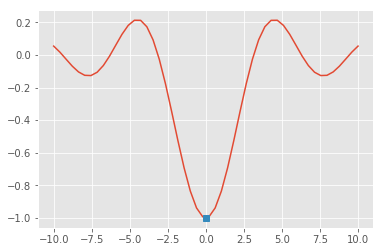

In [65]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [66]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [67]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [73]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [74]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [75]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [76]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [77]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [78]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
31,0.006981,0,1,0.835866,-0.002852,1,1
23,0.007037,0,1,0.835851,-0.002848,1,1
21,0.007072,0,1,0.835844,-0.002851,1,1
27,0.007993,0,1,0.835687,-0.002790,1,1
22,0.008034,0,1,0.835680,-0.002788,1,1


In [79]:
df_trials['qscore'].max()

0.8358657093793104

## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [259]:
def gen_features_2(df_gender, df_transactions):
    
    # Количество транзакций по каждому tr_type
    df_tr_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_tr_counts = df_tr_counts.rename(lambda x: 'tr_{}_count'.format(x), axis=1)
    
    # Доля транзакций по каждому дню недели (weekday)
    df_weekday_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='weekday', values='amount', 
                              aggfunc=np.size, fill_value=0)
    
    df_weekday_rations = df_weekday_rations.rename(lambda x: 'weekday_{}'.format(x), axis=1)
    
    total = df_weekday_rations.sum(axis=1)
    df_weekday_rations = (df_weekday_rations.T/total).T
    
    # Описание mcc

    df_transactions_mcc_pivot = df_transactions_mcc.loc[:, ['customer_id', 'mcc_description']]\
            .pivot_table(index=['customer_id'], 
                        values=['mcc_description'], 
                        aggfunc=lambda x: u' '.join(x), fill_value=u'')
    # Объединяем:
    df_features = df_gender.join(df_tr_counts, on='customer_id', how='left')\
                           .join(df_weekday_rations, on='customer_id', how='left')\
                           .join(df_transactions_mcc_pivot, on='customer_id', how='left')
        
    return df_features

In [260]:
df_features_ = df_gender.pipe(gen_features_2, df_transactions)

In [262]:
df_features_.head()

,customer_id,gender,tr_1000_count,tr_1010_count,tr_1030_count,tr_1100_count,tr_1110_count,tr_1200_count,tr_1210_count,tr_1310_count,...,tr_8145_count,tr_8146_count,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,mcc_description
0,75562265,0,0,3,200,0,0,0,0,0,...,0,0,0.148734,0.129747,0.170886,0.126582,0.189873,0.110759,0.123418,Финансовые институты — снятие наличности автом...
1,10928546,1,0,70,91,2,58,3,71,0,...,0,0,0.159059,0.174274,0.118949,0.181189,0.156293,0.102351,0.107884,Дилеры по продаже печатной продукции Места общ...
2,69348468,1,0,138,23,9,165,0,0,0,...,0,0,0.148402,0.150685,0.139269,0.130137,0.173516,0.130137,0.127854,"Горючее топливо — уголь, нефть, разжиженный бе..."
3,84816985,1,0,33,16,0,3,0,0,0,...,0,0,0.195876,0.175258,0.185567,0.134021,0.061856,0.144330,0.103093,Финансовые институты — снятие наличности автом...
4,61009479,0,0,63,42,36,19,0,0,0,...,0,0,0.135881,0.169851,0.167728,0.138004,0.159236,0.123142,0.106157,Финансовые институты — снятие наличности автом...


In [263]:
label = 'gender'
idx_features = df_features_.columns != label

In [264]:
X = df_features_.loc[:, idx_features].values
y = df_features_.loc[:, ~idx_features].values.flatten()

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [309]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [296]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [310]:
def run_trials_template2(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('union', FeatureUnion([
                ('text', Pipeline([
                    ('text_select', ColumnSelector(col_idx=len(X_[0])-1)),
                    ('count_vectorizer', CountVectorizer()),
#                     ('tfidf', TfidfTransformer(norm=None, smooth_idf=False))
                ])),
                ('features', Pipeline([
                    ('other_select', ColumnSelector(col_idx=range(len(X[0])-1))),
                    ('scaler', scaler)
                ]))
            ])),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [311]:
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True]),
}

In [312]:
trials = run_trials_template2(X, y, space4_lm, evals=40)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [313]:
df_trials = trials_df(trials)

In [314]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
25,0.007316,0,0,0.831427,-0.005696,0,0
39,0.006813,0,0,0.831318,-0.005130,0,1
15,0.007007,0,0,0.831303,-0.005122,0,1
33,0.007045,0,0,0.831295,-0.005116,0,1
21,0.008476,0,0,0.831163,-0.005653,0,0


In [317]:
df_trials.max()

C                   14.392966
class_weight         1.000000
penalty              0.000000
qscore               0.831427
qscore_std          -0.003997
scaler_centering     1.000000
scaler_type          1.000000
dtype: float64